# Problem 1.
Bottle return. A carefully controlled experiment was conducted to study the 
effect of the size of the deposit level on the likelihood that a returnable one-liter soft-drink bottle will be returned. A bottle return was scored 1, and no return was scored 0. 
The data to follow show the number of bottles that were returned (Y.j) out of 500 sold 
(n j) at each of six deposit levels (X j, in cents):
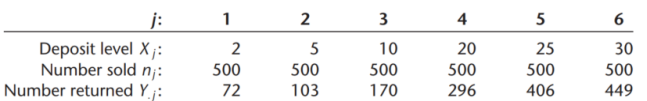

An analyst believes that logistic regression model is appropriate for studying the
relation between size of deposit and the probability a bottle will be returned.

a. Plot the estimated proportions 𝑝𝑗 = 𝑌𝑗/𝑛𝑗 against 𝑋𝑗
. Does the plot support the 
analyst’s belief that the logistic response function is appropriate?

b. Find the maximum likelihood estimates of 𝛽0 and 𝛽1
. State the fitted response 
function.

c. Obtain a scatter plot of the data with the estimated proportions from part (a), and 
superimpose the fitted logistic response function from part (b). Does the fitted logistic 
response function appear to fit well?

d. Obtain 𝑒𝑥𝑝(𝑏1) and interpret this number.

e. What is the estimated probability that a bottle will be returned when the deposit is 15 
cents?

f. Estimate the amount of deposit for which 75 percent of the bottles are expected to be
returned.

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('CH14PR11.txt', sep = '\s+', header =None, names=['Xj','nj','Yj'])
df.head()

,Xj,nj,Yj
0,2.0,500.0,72.0
1,5.0,500.0,103.0
2,10.0,500.0,170.0
3,20.0,500.0,296.0
4,25.0,500.0,406.0


In [3]:
X= df['Xj']
n= df['nj']
Y= df['Yj']

### a. Plot the estimated proportions 𝑝𝑗 = 𝑌𝑗/𝑛𝑗 against 𝑋𝑗 . Does the plot support the analyst’s belief that the logistic response function is appropriate?

In [4]:
p = Y/n

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Xj'>

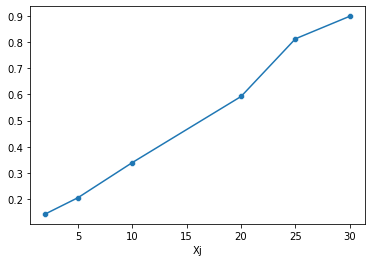

In [5]:
sns.scatterplot(X, p)
sns.lineplot(X, p)

#### => the plot support the analyst’s belief that the logistic response function is appropriate

### b. Find the maximum likelihood estimates of 𝛽0 and 𝛽1 . State the fitted response function.

In [6]:
import statsmodels.api as sm
Xnew = sm.add_constant(df['Xj'])
#Y = df['Yj']

logit_model = sm.GLM(p, Xnew, family=sm.families.Binomial())
logit_results = logit_model.fit()
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                    6
Model:                            GLM   Df Residuals:                        4
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2.0908
Date:                Sat, 10 Dec 2022   Deviance:                     0.024363
Time:                        19:40:03   Pearson chi2:                   0.0246
No. Iterations:                     4   Pseudo R-squ. (CS):             0.3060
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0766      1.897     -1.095      0.2

In [7]:
logit_results.params

const   -2.076565
Xj       0.135851
dtype: float64

By plugging in β0 = -2.0766 and β1 = 0.135851, we get the Logistic model is:

πˆ = [1 + exp(2.07656 − 0.13585 *X]^(−1)

### c. Obtain a scatter plot of the data with the estimated proportions from part (a), and super-impose the fitted logistic response function from part (b). Does the fitted logistic response function appear to fit well?

In [8]:
def logistic(a):
    return (np.exp(a) / (1 + np.exp(a)))

beta0 = logit_results.params[0]
beta1 = logit_results.params[1]

a = beta0 + beta1*df['Xj']
pi = logistic(a)

print(pi)

0    0.141260
1    0.198243
2    0.327821
3    0.654855
4    0.789133
5    0.880688
Name: Xj, dtype: float64


<AxesSubplot:xlabel='Xj'>

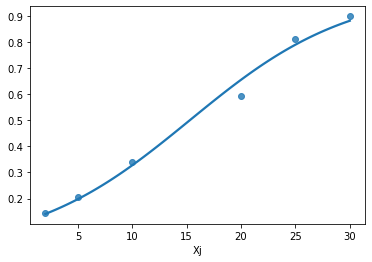

In [9]:
sns.regplot(x= X,y= p,data=df,logistic = True, ci =True)

### d. Obtain exp(b1) and interpret this number.

In [10]:
OR = np.exp(beta1)
print(OR)

1.1455109481658934


#### => the odds of completing the task increase by 14.5 percent with each additional month of experience.

### e. What is the estimated probability that a bottle will be returned when the deposit is 15 cents?

In [11]:
e = beta0 + beta1*15
pi = (np.exp(e) / (1 + np.exp(e)))
print(pi)

0.4903004704813551


#### => the estimated probability that a bottle will be returned when the deposit is 15 cents is 0.4903

### f. Estimate the amount of deposit for which 75 percent of the bottles are expected to be returned.

In [12]:
a = np.log(3)
d = (a - beta0) / beta1
d

23.372533976602604

#### The amount of deposit for which 75 percent of the bottles are expected to be returned is 23.37